RoBERT


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/6, Training Loss: 0.7031
Epoch 1/6, Validation Loss: 0.6951
Epoch 2/6, Training Loss: 0.6831
Epoch 2/6, Validation Loss: 0.6817
Epoch 3/6, Training Loss: 0.6839
Epoch 3/6, Validation Loss: 0.6935
Epoch 4/6, Training Loss: 0.6824
Epoch 4/6, Validation Loss: 0.6775
Epoch 5/6, Training Loss: 0.6798
Epoch 5/6, Validation Loss: 0.6777
Epoch 6/6, Training Loss: 0.6784
Epoch 6/6, Validation Loss: 0.6756


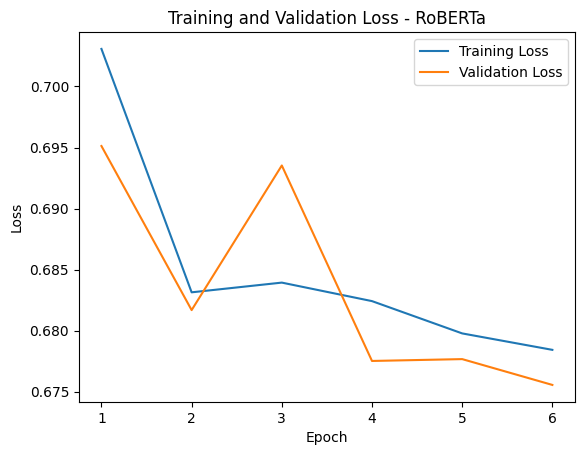

Accuracy: 63.50%
Precision: 0.4032
Recall: 0.6350
F1 Score: 0.4932


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt

# Load your dataset (replace 'justice.csv' with your actual CSV file)
df = pd.read_csv('justice.csv')

# Replace 'processed_facts' with the correct column name
X = df['facts']
y = df['first_party_winner']

# Tokenize the text using RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=True)
encoded_inputs = tokenizer(list(X), padding=True, truncation=True, return_tensors='pt')

# Convert labels to numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a PyTorch dataset
dataset = TensorDataset(encoded_inputs['input_ids'], encoded_inputs['attention_mask'], torch.tensor(y_encoded, dtype=torch.long))

# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoader for efficient processing
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Load pre-trained RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(label_encoder.classes_))

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

train_losses = []
val_losses = []

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 6
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    train_losses.append(average_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {average_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            # Extract predictions
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1).cpu().numpy()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions)

    val_loss /= len(test_dataloader)
    val_losses.append(val_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss:.4f}')

# Plotting the validation graph
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - RoBERTa')
plt.legend()
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


LegalBERT


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/6, Training Loss: 0.6959
Epoch 1/6, Validation Loss: 0.7286
Epoch 2/6, Training Loss: 0.6833
Epoch 2/6, Validation Loss: 0.6552
Epoch 3/6, Training Loss: 0.6618
Epoch 3/6, Validation Loss: 0.6573
Epoch 4/6, Training Loss: 0.5847
Epoch 4/6, Validation Loss: 0.7156
Epoch 5/6, Training Loss: 0.3963
Epoch 5/6, Validation Loss: 0.8849
Epoch 6/6, Training Loss: 0.1736
Epoch 6/6, Validation Loss: 1.3884


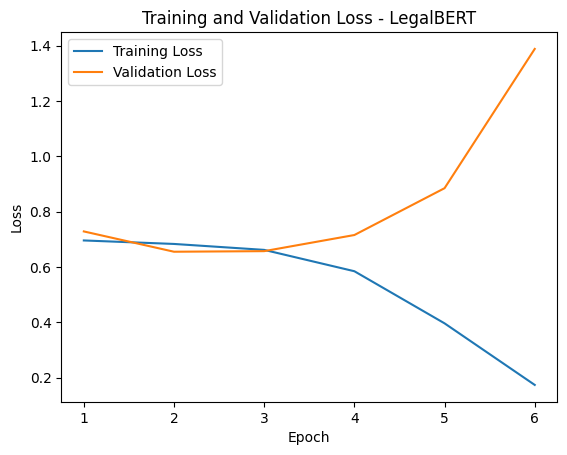

Accuracy: 56.83%
Precision: 0.5487
Recall: 0.5683
F1 Score: 0.5544


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt

# Load your dataset (replace 'justice.csv' with your actual CSV file)
df = pd.read_csv('justice.csv')

# Replace 'processed_facts' with the correct column name
X = df['facts']
y = df['first_party_winner']

# Tokenize the text using Legal-BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('nlpaueb/legal-bert-base-uncased', do_lower_case=True)
encoded_inputs = tokenizer(list(X), padding=True, truncation=True, return_tensors='pt')

# Convert labels to numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a PyTorch dataset
dataset = TensorDataset(encoded_inputs['input_ids'], encoded_inputs['attention_mask'], torch.tensor(y_encoded, dtype=torch.long))

# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoader for efficient processing
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Load pre-trained Legal-BERT model
model = BertForSequenceClassification.from_pretrained('nlpaueb/legal-bert-base-uncased', num_labels=len(label_encoder.classes_))

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

train_losses = []
val_losses = []

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 6
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    train_losses.append(average_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {average_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            # Extract predictions
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1).cpu().numpy()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions)

    val_loss /= len(test_dataloader)
    val_losses.append(val_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss:.4f}')

# Plotting the validation graph
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - LegalBERT')
plt.legend()
plt.show()

# Calculate evaluation metrics
accuracy_1 = accuracy_score(y_true, y_pred)
precision_1 = precision_score(y_true, y_pred, average='weighted')
recall_1 = recall_score(y_true, y_pred, average='weighted')
f1_1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy_1 * 100:.2f}%')
print(f'Precision: {precision_1:.4f}')
print(f'Recall: {recall_1:.4f}')
print(f'F1 Score: {f1_1:.4f}')


Electra

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/6, Training Loss: 0.6856
Epoch 1/6, Validation Loss: 0.7211
Epoch 2/6, Training Loss: 0.6741
Epoch 2/6, Validation Loss: 0.7113
Epoch 3/6, Training Loss: 0.6715
Epoch 3/6, Validation Loss: 0.6883
Epoch 4/6, Training Loss: 0.6714
Epoch 4/6, Validation Loss: 0.6905
Epoch 5/6, Training Loss: 0.6744
Epoch 5/6, Validation Loss: 0.6897
Epoch 6/6, Training Loss: 0.6705
Epoch 6/6, Validation Loss: 0.6888


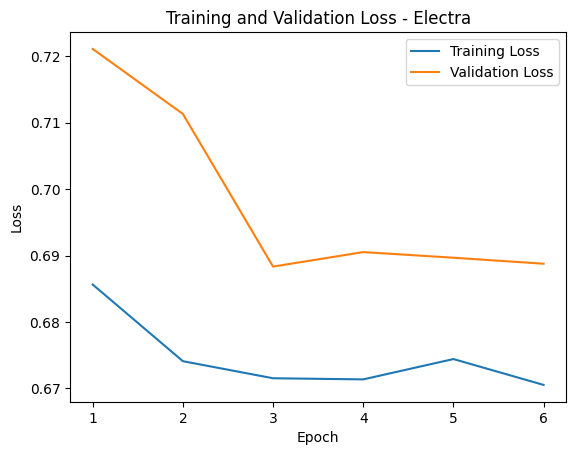

Accuracy: 60.83%
Precision: 0.3701
Recall: 0.6083
F1 Score: 0.4602


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import ElectraTokenizer, ElectraForSequenceClassification, AdamW
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt

# Load your dataset (replace 'justice.csv' with your actual CSV file)
df = pd.read_csv('justice.csv')

# Replace 'processed_facts' with the correct column name
X = df['facts']
y = df['first_party_winner']

# Tokenize the text using Electra tokenizer
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator', do_lower_case=True)
encoded_inputs = tokenizer(list(X), padding=True, truncation=True, return_tensors='pt')

# Convert labels to numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a PyTorch dataset
dataset = TensorDataset(encoded_inputs['input_ids'], encoded_inputs['attention_mask'], torch.tensor(y_encoded, dtype=torch.long))

# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoader for efficient processing
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Load pre-trained Electra model
model = ElectraForSequenceClassification.from_pretrained('google/electra-base-discriminator', num_labels=len(label_encoder.classes_))

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

train_losses = []
val_losses = []

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 6
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    train_losses.append(average_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {average_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            # Extract predictions
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1).cpu().numpy()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions)

    val_loss /= len(test_dataloader)
    val_losses.append(val_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss:.4f}')

# Plotting the validation graph
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - Electra')
plt.legend()
plt.show()

# Calculate evaluation metrics
accuracy_3 = accuracy_score(y_true, y_pred)
precision_3 = precision_score(y_true, y_pred, average='weighted')
recall_3 = recall_score(y_true, y_pred, average='weighted')
f1_3 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy_3 * 100:.2f}%')
print(f'Precision: {precision_3:.4f}')
print(f'Recall: {recall_3:.4f}')
print(f'F1 Score: {f1_3:.4f}')


DistillBERT

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/6, Training Loss: 0.6941
Epoch 1/6, Validation Loss: 0.7060
Epoch 2/6, Training Loss: 0.6759
Epoch 2/6, Validation Loss: 0.6528
Epoch 3/6, Training Loss: 0.6322
Epoch 3/6, Validation Loss: 0.6930
Epoch 4/6, Training Loss: 0.4746
Epoch 4/6, Validation Loss: 0.8306
Epoch 5/6, Training Loss: 0.2177
Epoch 5/6, Validation Loss: 1.2888
Epoch 6/6, Training Loss: 0.0891
Epoch 6/6, Validation Loss: 1.6743


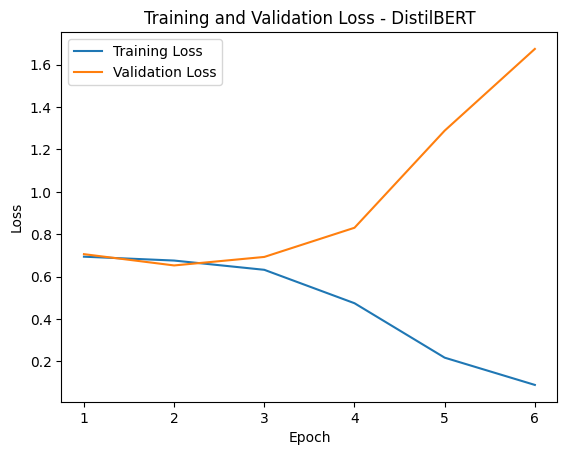

Accuracy: 55.67%
Precision: 0.5639
Recall: 0.5567
F1 Score: 0.5599


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt

# Load your dataset (replace 'justice.csv' with your actual CSV file)
df = pd.read_csv('justice.csv')

# Replace 'processed_facts' with the correct column name
X = df['facts']
y = df['first_party_winner']

# Tokenize the text using DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)
encoded_inputs = tokenizer(list(X), padding=True, truncation=True, return_tensors='pt')

# Convert labels to numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a PyTorch dataset
dataset = TensorDataset(encoded_inputs['input_ids'], encoded_inputs['attention_mask'], torch.tensor(y_encoded, dtype=torch.long))

# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoader for efficient processing
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Load pre-trained DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder.classes_))

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

train_losses = []
val_losses = []

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 6
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    train_losses.append(average_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {average_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            # Extract predictions
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1).cpu().numpy()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions)

    val_loss /= len(test_dataloader)
    val_losses.append(val_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss:.4f}')

# Plotting the validation graph
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - DistilBERT')
plt.legend()
plt.show()

# Calculate evaluation metrics
accuracy_2 = accuracy_score(y_true, y_pred)
precision_2 = precision_score(y_true, y_pred, average='weighted')
recall_2 = recall_score(y_true, y_pred, average='weighted')
f1_2 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy_2 * 100:.2f}%')
print(f'Precision: {precision_2:.4f}')
print(f'Recall: {recall_2:.4f}')
print(f'F1 Score: {f1_2:.4f}')


Proposed Model ( RoBERTa and Electra)


In [1]:
import torch.nn as nn

In [2]:
import pandas as pd
df = pd.read_csv('justice.csv')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/6, Training Loss: 0.6984
Epoch 1/6, Validation Loss: 0.6811
Epoch 2/6, Training Loss: 0.6826
Epoch 2/6, Validation Loss: 0.6906
Epoch 3/6, Training Loss: 0.6795
Epoch 3/6, Validation Loss: 0.6861
Epoch 4/6, Training Loss: 0.6795
Epoch 4/6, Validation Loss: 0.6867
Epoch 5/6, Training Loss: 0.6740
Epoch 5/6, Validation Loss: 0.6866
Epoch 6/6, Training Loss: 0.6815
Epoch 6/6, Validation Loss: 0.6956


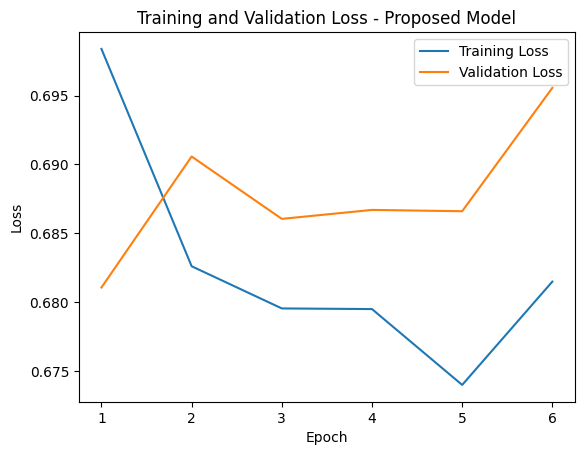

Accuracy: 65.00%
Precision: 0.4225
Recall: 0.6500
F1 Score: 0.5121


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import RobertaModel, RobertaTokenizer, ElectraModel, ElectraTokenizer, AdamW
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt

# Load your dataset (replace 'justice.csv' with your actual CSV file)


# Replace 'facts' and 'first_party_winner' with the correct column names
X = df['facts']
y = df['first_party_winner']

# Tokenize the text using RoBERTa tokenizer
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_inputs = roberta_tokenizer(list(X), padding=True, truncation=True, return_tensors='pt')

# Tokenize the text using Electra tokenizer
electra_tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')
electra_inputs = electra_tokenizer(list(X), padding=True, truncation=True, return_tensors='pt')

# Convert labels to numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a PyTorch dataset
roberta_dataset = TensorDataset(roberta_inputs['input_ids'], roberta_inputs['attention_mask'], torch.tensor(y_encoded, dtype=torch.long))
electra_dataset = TensorDataset(electra_inputs['input_ids'], electra_inputs['attention_mask'], torch.tensor(y_encoded, dtype=torch.long))

# Split the datasets into training and testing sets
train_size = int(0.8 * len(roberta_dataset))
test_size = len(roberta_dataset) - train_size
train_roberta_dataset, test_roberta_dataset = random_split(roberta_dataset, [train_size, test_size])
train_electra_dataset, test_electra_dataset = random_split(electra_dataset, [train_size, test_size])

# Create DataLoader for efficient processing
train_roberta_dataloader = DataLoader(train_roberta_dataset, batch_size=8, shuffle=True)
test_roberta_dataloader = DataLoader(test_roberta_dataset, batch_size=8, shuffle=False)
train_electra_dataloader = DataLoader(train_electra_dataset, batch_size=8, shuffle=True)
test_electra_dataloader = DataLoader(test_electra_dataset, batch_size=8, shuffle=False)

# Define the combined model architecture
class CombinedModel(nn.Module):
    def __init__(self, roberta_model, electra_model):
        super(CombinedModel, self).__init__()
        self.roberta_model = roberta_model
        self.electra_model = electra_model
        self.fc = nn.Linear(roberta_model.config.hidden_size + electra_model.config.hidden_size, len(label_encoder.classes_))

    def forward(self, input_ids_roberta, attention_mask_roberta, input_ids_electra, attention_mask_electra):
        roberta_output = self.roberta_model(input_ids=input_ids_roberta, attention_mask=attention_mask_roberta)[0][:, 0, :]
        electra_output = self.electra_model(input_ids=input_ids_electra, attention_mask=attention_mask_electra)[0][:, 0, :]
        combined_output = torch.cat((roberta_output, electra_output), dim=1)
        logits = self.fc(combined_output)
        return logits

# Load pre-trained RoBERTa and Electra models
roberta_model = RobertaModel.from_pretrained('roberta-base')
electra_model = ElectraModel.from_pretrained('google/electra-base-discriminator')

# Create combined model instance
combined_model = CombinedModel(roberta_model, electra_model)

# Set up optimizer
optimizer = AdamW(combined_model.parameters(), lr=5e-5)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
combined_model.to(device)

num_epochs = 6
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    combined_model.train()
    total_loss = 0
    for batch_roberta, batch_electra in zip(train_roberta_dataloader, train_electra_dataloader):
        input_ids_roberta, attention_mask_roberta, labels_roberta = batch_roberta
        input_ids_electra, attention_mask_electra, labels_electra = batch_electra

        input_ids_roberta, attention_mask_roberta, labels_roberta = input_ids_roberta.to(device), attention_mask_roberta.to(device), labels_roberta.to(device)
        input_ids_electra, attention_mask_electra, labels_electra = input_ids_electra.to(device), attention_mask_electra.to(device), labels_electra.to(device)

        optimizer.zero_grad()

        logits = combined_model(input_ids_roberta, attention_mask_roberta, input_ids_electra, attention_mask_electra)
        loss = nn.CrossEntropyLoss()(logits, labels_roberta)

        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_roberta_dataloader)
    train_losses.append(average_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {average_loss:.4f}')

    # Validation
    combined_model.eval()
    val_loss = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for batch_roberta, batch_electra in zip(test_roberta_dataloader, test_electra_dataloader):
            input_ids_roberta, attention_mask_roberta, labels_roberta = batch_roberta
            input_ids_electra, attention_mask_electra, labels_electra = batch_electra

            input_ids_roberta, attention_mask_roberta, labels_roberta = input_ids_roberta.to(device), attention_mask_roberta.to(device), labels_roberta.to(device)
            input_ids_electra, attention_mask_electra, labels_electra = input_ids_electra.to(device), attention_mask_electra.to(device), labels_electra.to(device)

            logits = combined_model(input_ids_roberta, attention_mask_roberta, input_ids_electra, attention_mask_electra)
            loss = nn.CrossEntropyLoss()(logits, labels_roberta)

            val_loss += loss.item()

            # Extract predictions
            predictions = torch.argmax(logits, dim=1).cpu().numpy()
            y_true.extend(labels_roberta.cpu().numpy())
            y_pred.extend(predictions)


    val_loss /= len(test_roberta_dataloader)
    val_losses.append(val_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss:.4f}')

# Plotting the validation graph
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - Proposed Model')
plt.legend()
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

LegalBERT and RoBERTa


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/6: Train Loss: 0.6710, Validation Loss: 0.6713
Epoch 2/6: Train Loss: 0.6589, Validation Loss: 0.6546
Epoch 3/6: Train Loss: 0.6588, Validation Loss: 0.6496
Epoch 4/6: Train Loss: 0.6564, Validation Loss: 0.6505
Epoch 5/6: Train Loss: 0.6580, Validation Loss: 0.6492
Epoch 6/6: Train Loss: 0.6538, Validation Loss: 0.6499
Metrics:
Accuracy: 0.6472
Precision: 0.4188
Recall: 0.6472
F1 Score: 0.5085


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


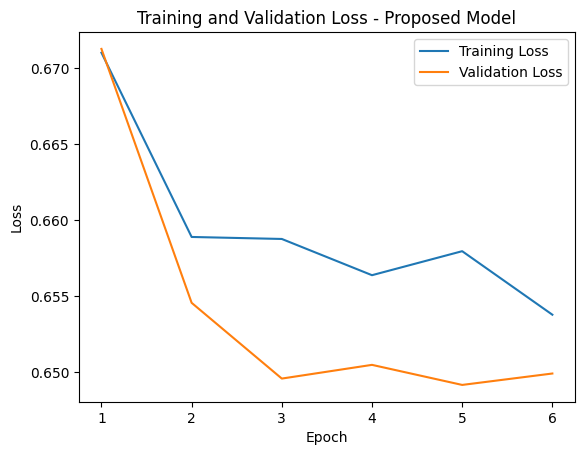

In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import RobertaTokenizer, RobertaModel, BertTokenizer, BertModel, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


df = pd.read_csv('justice.csv')

df.dropna(subset=['first_party_winner'], inplace=True)


X = df['facts']
y = df['first_party_winner']


tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=True)
encoded_inputs_roberta = tokenizer_roberta(list(X), padding=True, truncation=True, return_tensors='pt')


tokenizer_legal_bert = BertTokenizer.from_pretrained('nlpaueb/legal-bert-base-uncased', do_lower_case=True)
encoded_inputs_legal_bert = tokenizer_legal_bert(list(X), padding=True, truncation=True, return_tensors='pt')


input_ids_concat = torch.cat((encoded_inputs_roberta['input_ids'], encoded_inputs_legal_bert['input_ids']), dim=1)
attention_mask_concat = torch.cat((encoded_inputs_roberta['attention_mask'], encoded_inputs_legal_bert['attention_mask']), dim=1)

X_train, X_val, y_train, y_val = train_test_split(input_ids_concat, y, test_size=0.2, random_state=42)
attention_train, attention_val, _, _ = train_test_split(attention_mask_concat, y, test_size=0.2, random_state=42)

X_train_np = X_train.numpy()
attention_train_np = attention_train.numpy()
y_train_np = y_train.values.astype(np.int64)
X_val_np = X_val.numpy()
attention_val_np = attention_val.numpy()
y_val_np = y_val.values.astype(np.int64)

train_dataset = TensorDataset(torch.tensor(X_train_np, dtype=torch.long),
                              torch.tensor(attention_train_np, dtype=torch.long),
                              torch.tensor(y_train_np, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_val_np, dtype=torch.long),
                            torch.tensor(attention_val_np, dtype=torch.long),
                            torch.tensor(y_val_np, dtype=torch.long))

batch_size=8



train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)


class HybridClassifier(torch.nn.Module):
    def __init__(self, roberta_model, legal_bert_model, num_labels):
        super(HybridClassifier, self).__init__()
        self.roberta_model = roberta_model
        self.legal_bert_model = legal_bert_model
        self.classifier = torch.nn.Linear(roberta_model.config.hidden_size + legal_bert_model.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        roberta_output = self.roberta_model(input_ids=input_ids[:, :input_ids.shape[1] // 2], attention_mask=attention_mask[:, :attention_mask.shape[1] // 2])
        legal_bert_output = self.legal_bert_model(input_ids=input_ids[:, input_ids.shape[1] // 2:], attention_mask=attention_mask[:, attention_mask.shape[1] // 2:])


        concatenated_output = torch.cat((roberta_output.last_hidden_state[:, 0, :], legal_bert_output.last_hidden_state[:, 0, :]), dim=1)


        logits = self.classifier(concatenated_output)
        return logits


roberta_model = RobertaModel.from_pretrained('roberta-base')
legal_bert_model = BertModel.from_pretrained('nlpaueb/legal-bert-base-uncased')


num_labels = 2
hybrid_classifier = HybridClassifier(roberta_model, legal_bert_model, num_labels)


optimizer = AdamW(hybrid_classifier.parameters(), lr=5e-5)


loss_fn = torch.nn.CrossEntropyLoss()


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
hybrid_classifier.to(device)
epochs = 6

train_losses = []
val_losses = []

for epoch in range(epochs):

    hybrid_classifier.train()
    total_loss = 0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        logits = hybrid_classifier(input_ids, attention_mask)
        loss = loss_fn(logits, labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)


    hybrid_classifier.eval()
    val_losses_epoch = []
    y_preds = []
    y_labels = []
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            logits = hybrid_classifier(input_ids, attention_mask)
            val_loss = loss_fn(logits, labels)
            val_losses_epoch.append(val_loss.item())

            y_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            y_labels.extend(labels.cpu().numpy())

    avg_val_loss = np.mean(val_losses_epoch)
    val_losses.append(avg_val_loss)

    print(f'Epoch {epoch + 1}/{epochs}: Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

accuracy = accuracy_score(y_labels, y_preds)
precision = precision_score(y_labels, y_preds, average='weighted')
recall = recall_score(y_labels, y_preds, average='weighted')
f1 = f1_score(y_labels, y_preds, average='weighted')

print(f'Metrics:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - Proposed Model')
plt.legend()
plt.show()